# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training.csv" and "LifeExpectancy_test.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test.csv"

Features :
- Year : from 2000 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training.csv", contains 1154 rows and 14 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test.csv", contains 495 rows and 13 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the training data "LifeExpectancy_training.csv" in Colab and View the first 5 lines

In [2]:
# Load the training data
import io
df_train = pd.read_csv('LifeExpectancy_training.csv')

In [3]:
# Show the first 5 lines
### WRITE CODE ###
df_train.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Adult_Mortality'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'percentage_expenditure'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Total_expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'HIV_AIDS'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Income_composition_of_resources'}>,
        <AxesSubplot:title={'center':'Schooling'}>],
       [<AxesSubplot:title={'center':'Life_expectancy'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

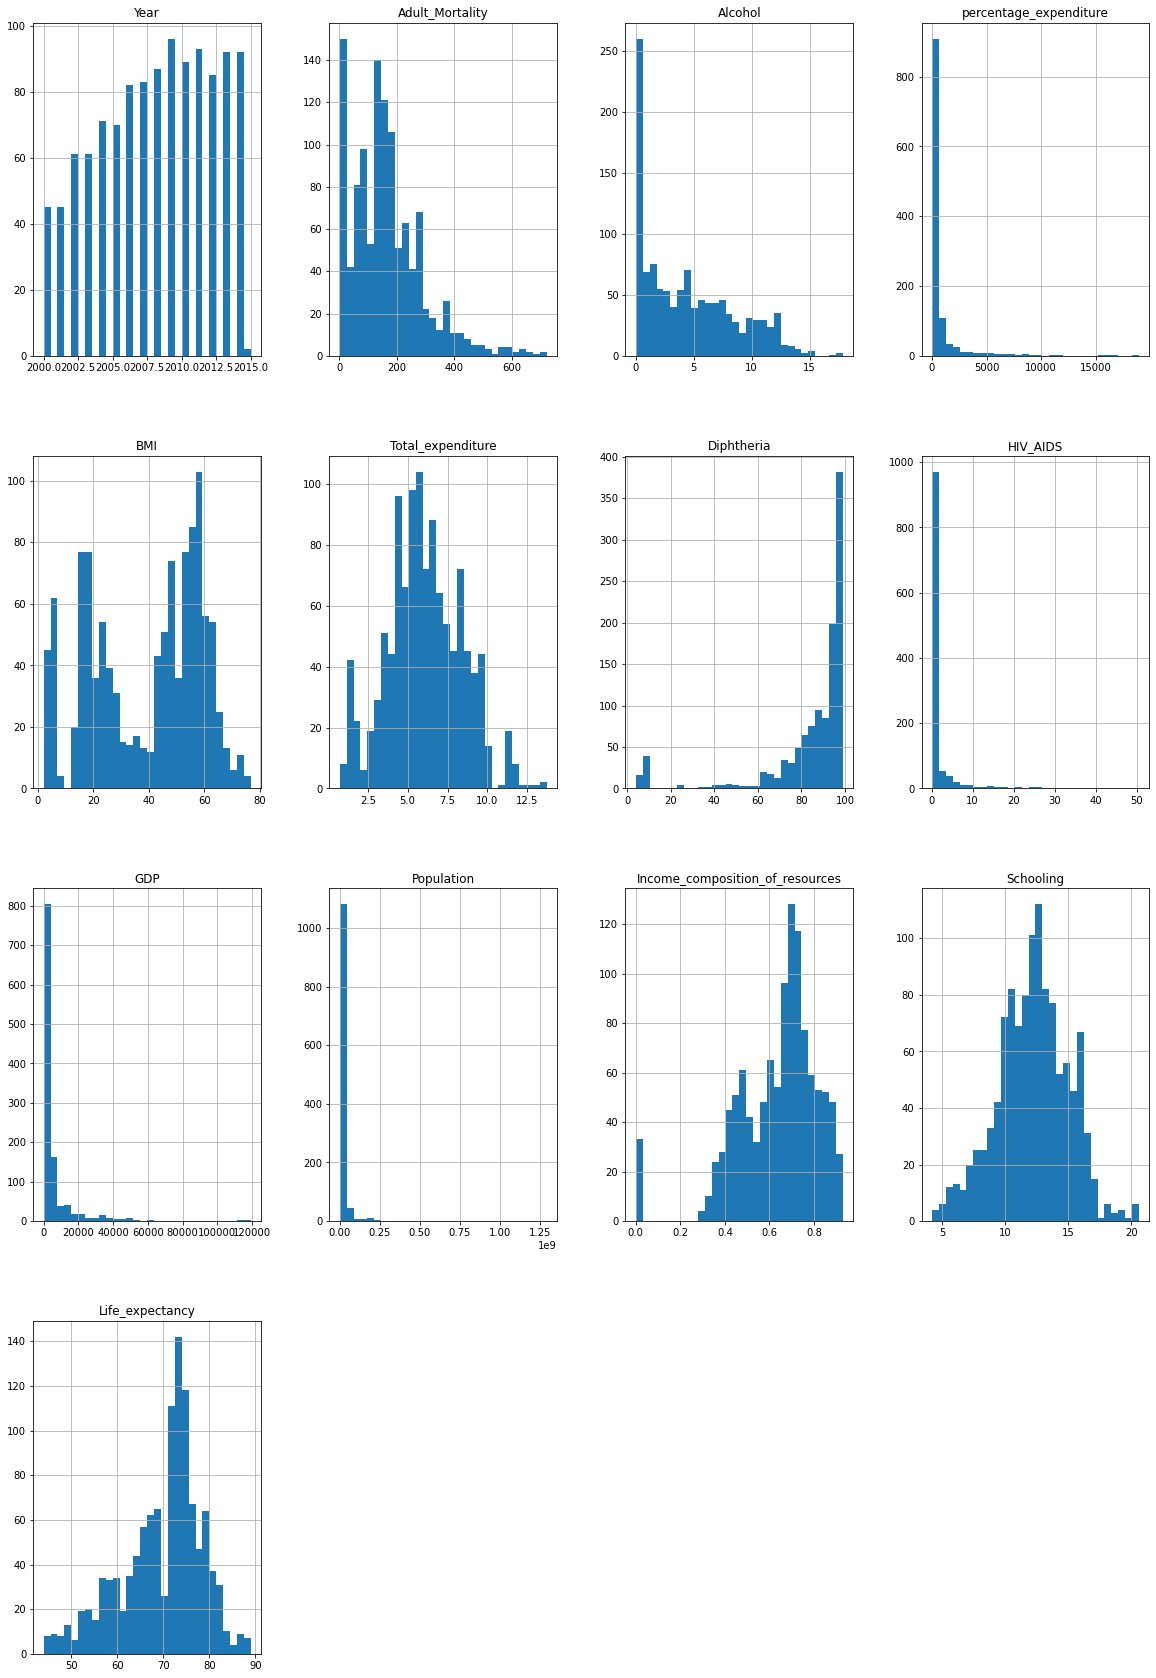

In [4]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
df_train_wo_year = df_train.drop(labels = ['Status'], axis = 1)
df_train_wo_year.hist(bins = 30, figsize = (20,30))

##### Q1. What can you infer from the histograms? <br/>
Ans- 


Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

<AxesSubplot:>

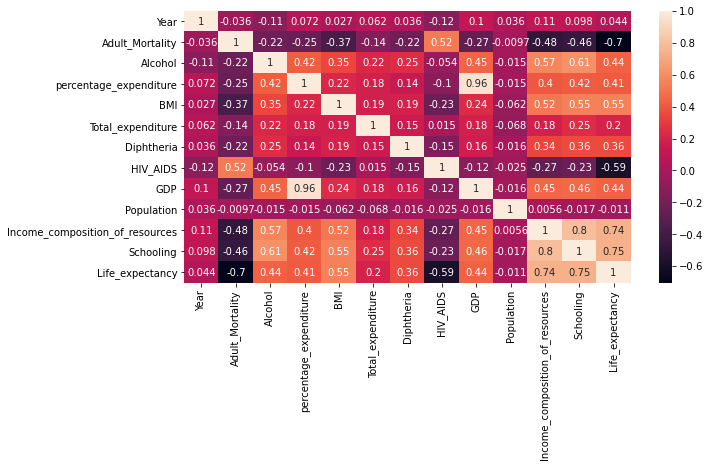

In [5]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
df_train.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_train.corr(), annot=True, ax = ax)

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans- Each parameter in the sample is correlated with itself. This is why the diagonals are made up of 1s.

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans- The matrix is symmetric along the diagonal as the combination of parameters is also symmetric along the diagonal and the Corr(X1, X2) = Corr(X2,X1)

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
Ans-The predictor would be Schooling as it has the highest correlation among all the predictors with the target Life_expectancy


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set. 

In [6]:
# Load the test set "LifeExpectancy_test.csv"
### WRITE CODE ###
df_test = pd.read_csv('LifeExpectancy_test.csv')
df_test.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,2011,Developing,275,0.01,7.097109,17.2,7.87,68,0.1,63.537231,2978599.0,0.454,9.5
1,2008,Developing,287,0.03,25.873925,15.7,8.33,64,0.1,373.361116,2729431.0,0.433,8.7
2,2011,Developing,88,5.37,437.062100,55.1,5.71,99,0.1,4437.178680,295195.0,0.738,13.3
3,2005,Developing,15,5.16,26.993121,49.9,6.12,98,0.1,279.142931,311487.0,0.685,10.8
4,2003,Developing,18,4.29,14.719289,47.9,6.27,97,0.1,189.681557,339616.0,0.674,10.7


In [7]:
df_test_wo_categories = df_test.drop(labels = ['Year','Status'], axis = 1)
df_train_wo_categories = df_train.drop(labels = ['Year','Status','Life_expectancy'], axis = 1)

In [8]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###
scaler = StandardScaler()
df_train_wo_categories_scaled = pd.DataFrame(scaler.fit_transform(df_train_wo_categories), columns = df_train_wo_categories.columns)
df_test_wo_categories_scaled = pd.DataFrame(scaler.fit_transform(df_test_wo_categories), columns = df_test_wo_categories.columns)

df_train_wo_categories_scaled.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,-0.596230,-0.746122,0.058789,1.260316,0.455246,-0.172026,-0.304462,0.244064,-0.140504,0.668903,0.361049
1,-0.111399,0.462190,0.033498,-0.333480,-0.836894,0.686328,-0.304462,0.011425,0.961461,0.553909,0.505181
2,-0.801666,1.812804,-0.350645,0.887085,2.186713,0.495582,-0.304462,-0.437269,-0.073327,1.375298,1.261876
3,-0.251096,-1.135578,-0.399597,1.053526,-0.212360,0.447896,-0.304462,-0.482448,-0.185208,0.882465,0.901545
4,0.217300,0.342358,-0.385264,-1.856665,-1.017793,0.543269,-0.198197,-0.458771,-0.107964,0.115834,-0.251513


##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans- <br>
Advantages - <br>
outliers do not have the same influence on the models built from the dataset as they would have without normalization. <br>
It allows us to compare two different scores from two different scales of normal distributions

Disadvantages - 
You end up losing the meaningfulness of the raw values in the data so interpretability becomes difficult.


##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- 
Yes, as there are the range of variance among the features is high so normalizing will help the model to build.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [9]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###
encoder = OneHotEncoder(drop = 'first')
df_train_Year_encoded = pd.DataFrame(encoder.fit_transform(df_train[['Year']]).toarray(), columns = encoder.get_feature_names(['Year']))
df_train_Status_encoded = pd.DataFrame(encoder.fit_transform(df_train[['Status']]).toarray(), columns = encoder.get_feature_names(['Status']))
df_test_Year_encoded = pd.DataFrame(encoder.fit_transform(df_train[['Year']]).toarray(), columns = encoder.get_feature_names(['Year']))
df_test_Status_encoded = pd.DataFrame(encoder.fit_transform(df_train[['Status']]).toarray(), columns = encoder.get_feature_names(['Status']))
# Print the shape of your encoded X
print(f'Shape of Year Train Data : {df_train_Year_encoded.shape}')
print(f'Shape of Status Train Data : {df_train_Status_encoded.shape}')
print(f'Shape of Year Test Data : {df_test_Year_encoded.shape}')
print(f'Shape of Status Test Data : {df_test_Status_encoded.shape}')

df_test_Status_encoded.head()

Shape of Year Train Data : (1154, 15)
Shape of Status Train Data : (1154, 1)
Shape of Year Test Data : (1154, 15)
Shape of Status Test Data : (1154, 1)


,Status_Developing
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


Q7. What are the advantages and disadvantages of using One-hot encoding?

Ans- <br>
Advantages <br>
1) One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. <br> 
2) For categorical features with low number of categories, one-hot-encoding works well as the number of dimensions added is not many and the information is still contained within those dimensions.<br><br>
Disadvantages <br> 
1) The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.<br>
2) If the number of categories is high for a feature, you end up with a high number of dimensions with ones occasionally dotting a sea of zeroes. This results in an exceptionally sparse landscape, which makes it hard to grapple with optimization. 

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
### Bulding and fitting the Multiple Linear Regression model###
mlr = LinearRegression()
df_for_regression = pd.concat([df_train_wo_categories_scaled, df_train_Year_encoded, df_train_Status_encoded], axis = 1)
mlr.fit(df_for_regression, df_train[['Life_expectancy']])
Life_expectancy_pred = mlr.predict(df_for_regression)
#print(type(Life_expectancy_pred))
df_Life_expectancy_pred = pd.DataFrame(Life_expectancy_pred, columns = ['Predicted Life Expectancy'])
df_Life_expectancy_pred.head()

,Predicted Life Expectancy
0,74.571327
1,71.883044
2,78.169860
3,75.988897
4,67.963980


In [12]:
df_Life_expectancy_true = df_train['Life_expectancy'].to_frame(name = 'True Life Expectancy')
df_Life_expectancy_true.head()

,True Life Expectancy
0,75.0
1,74.6
2,81.1
3,74.8
4,71.4


In [13]:
df_for_regression.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,-0.596230,-0.746122,0.058789,1.260316,0.455246,-0.172026,-0.304462,0.244064,-0.140504,0.668903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.111399,0.462190,0.033498,-0.333480,-0.836894,0.686328,-0.304462,0.011425,0.961461,0.553909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.801666,1.812804,-0.350645,0.887085,2.186713,0.495582,-0.304462,-0.437269,-0.073327,1.375298,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.251096,-1.135578,-0.399597,1.053526,-0.212360,0.447896,-0.304462,-0.482448,-0.185208,0.882465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.217300,0.342358,-0.385264,-1.856665,-1.017793,0.543269,-0.198197,-0.458771,-0.107964,0.115834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Comparing True & Predicted Life Expectancy

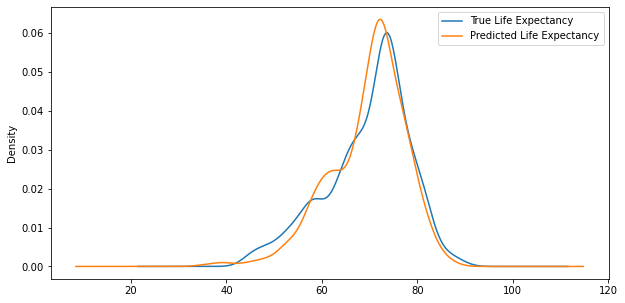

In [14]:
ax = df_Life_expectancy_true.plot(kind = 'density', figsize = (10,5))
df_Life_expectancy_pred.plot(kind = 'density', figsize = (10,5), ax = ax)
plt.show()

In [15]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred = Life_expectancy_pred, y_true = df_train['Life_expectancy'])
print(mse)

12.965318722949506


Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [16]:
#mlr.coef_
coef_table = pd.DataFrame(list(df_for_regression.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",mlr.coef_.transpose())
coef_table

,0,Coefs
0,Adult_Mortality,-2.056002
1,Alcohol,-0.490003
2,percentage_expenditure,0.552403
3,BMI,0.725747
4,Total_expenditure,0.227959
5,Diphtheria,0.456559
6,HIV_AIDS,-2.666912
7,GDP,0.231527
8,Population,-0.055062
9,Income_composition_of_resources,2.043052


Q9. Is there a problem of multicolinearity? Explain what you can do

Ans- <br>
Yes, there is a problem of multicollinearity. <br>
Multicollinearity exists when multiple features in the data are correlated with themselves. <br>
From the correlation heatmap of existing training features, we can see multiple features having high correlation within themselves. <br>
For example, features like GDP and Percentage_of_expenditures have a correlation of 0.96 which is very high and one of the features must be dropped in order for the model to predict better. <br>

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [17]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [18]:
### WRITE CODE ###
slr = LinearRegression()
slr.fit(df_train_wo_categories_scaled[['Schooling']], df_train[['Life_expectancy']])
Life_expectancy_pred_slr1 = slr.predict(df_train_wo_categories_scaled[['Schooling']])
# Print R2 score
r2_score(df_train.Life_expectancy, Life_expectancy_pred_slr1)

0.5575121346397232

$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [19]:
### WRITE CODE ###
slr2 = LinearRegression()
slr2.fit(df_train_wo_categories_scaled[['Schooling','Adult_Mortality']], df_train[['Life_expectancy']])
Life_expectancy_pred_slr2 = slr2.predict(df_train_wo_categories_scaled[['Schooling','Adult_Mortality']])
# Print R2 score
r2_score(df_train.Life_expectancy, Life_expectancy_pred_slr2)

0.7223314341007621

$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [20]:
### WRITE CODE ###
slr3 = LinearRegression()
slr3.fit(df_train_wo_categories_scaled[['Schooling','Adult_Mortality','Population']], df_train[['Life_expectancy']])
Life_expectancy_pred_slr3 = slr3.predict(df_train_wo_categories_scaled[['Schooling','Adult_Mortality','Population']])
# Print R2 score
r2_score(df_train.Life_expectancy, Life_expectancy_pred_slr3)

0.7223745101723086

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [21]:
### WRITE CODE ###
def calculate_adj_r2(y_pred, y_true, x_values):
    try:
        x_dim = x_values.shape[1]
    except:
        x_dim = 1
    
    adj_r2 = 1 - (1-r2_score(y_true, y_pred) * (len(y_true)-1) / (len(y_true) - x_dim - 1))
    
    return adj_r2
# Print Adjusted R2 score 
calculate_adj_r2(Life_expectancy_pred_slr1, df_train.Life_expectancy, df_train_wo_categories_scaled[['Schooling']])

0.5579960861454869

Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [22]:
### WRITE CODE ###
calculate_adj_r2(Life_expectancy_pred_slr2, df_train.Life_expectancy, df_train_wo_categories_scaled[['Schooling','Adult_Mortality']])
# Print Adjusted R2 score

0.7235865712581917

Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [23]:
### WRITE CODE ###

# Print Adjusted R2 score
calculate_adj_r2(Life_expectancy_pred_slr3, df_train.Life_expectancy, df_train_wo_categories_scaled[['Schooling','Adult_Mortality','Population']])

0.7242589654162364

### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [24]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.
from sklearn.utils import shuffle
import math
def cross_val_mse(X, y, f):
    ### Write your code here ###
    
    #Shuffling rows in the both X and Y at the same time
    X_shuffled, Y_shuffled = shuffle(X, y)
    total_row_count = X.shape[0]
    all_rows = list(range(total_row_count))
    mse_vals = []
    
    #print(X_shuffled.head())
    #print(Y_shuffled.head())
    
    for i in range(f):
        
        #Finding the upper and lower limits of each fold
        lower_lim = i * int(math.ceil(total_row_count/f))
        upper_lim = min(((i+1) * int(math.ceil(total_row_count/f))), total_row_count-1)
        
        #print(lower_lim)
        #print(upper_lim)
        
        #Getting rows for each subset/fold
        validated_rows = list(range(lower_lim,upper_lim, 1))
        train_rows = [x for x in all_rows if x not in validated_rows]
        
        #print(X_validated_rows)
        #print(X_train_rows)
        
        #Grabbing the subset of rows for validation and training set for Cross Validation
        X_validation_df = X_shuffled.iloc[validated_rows,]
        X_train_df = X_shuffled.iloc[train_rows,]
        
        Y_validation_df = Y_shuffled.iloc[validated_rows,]
        Y_train_df = Y_shuffled.iloc[train_rows,]
        
        #print(X_validation_df.head())
        #print(X_train_df.head())
        
        #Building the linear regression model on above obtained subsets
        linear_regressor = LinearRegression().fit(X_train_df, Y_train_df)
        y_pred = linear_regressor.predict(X_validation_df)
        mse_vals.append(mean_squared_error(Y_validation_df,y_pred))
        
        
        
    return (np.mean(mse_vals))

In [25]:
cross_val_mse(df_for_regression, df_train[['Life_expectancy']], 10)

13.754412578870774

In [26]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE 
from itertools import combinations 

### Write code here ###


#  1. Writing the generate_combinations() function to evaluate all possible combinations 

def generate_combinations(X, y):
    """" A function which evaluates all possible combinations of features in X. 
    A linear regression model is trained which all possible combinations of features, and then the function returns
    (A) the combination of features, (B) the avg. CV MSE, (C) the avg. CV R^2 and (D) the avg. adjusted CV R^2. """
    
    # Ensure that X is a dataframe
    df_X = pd.DataFrame(X)
    
    # Defining relevant variables
    final_combinations = []
    final_MSEs = []
    subset = []
    
    # loop through all possible combinations with two columns, then all possible combinations of three columns, etc. etc.
    for rep in range(2, len(df_X.columns)):
        
        print('\n\n\nRepetition ', rep, ' of ', len(df_X.columns)) 
        
        # PART 1: GENERATING COMBINATIONS 

        # Generate all possible combinations with i columns
        possible_combinations = list(combinations(df_X.columns,rep))

        # Loop through each possible combination
        for combination in possible_combinations:
            
            if set(subset).issubset(list(combination)):
                # Create a df_X with only those columns listed in the relevant combination
                select_cols = []
                for i in combination:
                    select_cols.append(i)

                df_X_combination = df_X[select_cols]

                # PART 2: TRAINING THE MODEL BASED ON THE COMBINATION WITH CROSS_VAL_MSE
                mse_value = cross_val_mse(df_X_combination, y, 5)


                # SAVING THE COMBINATION AND CORRESPONDING MSE VALUE
                final_combinations.append(combination)
                final_MSEs.append(mse_value)
            else:
                continue

    return pd.DataFrame({'combination':final_combinations, 'mse':final_MSEs})

In [ ]:
# Print the best features and the corresponding mse
### WRITE CODE ###
combination_results = generate_combinations(df_for_regression, df_train[['Life_expectancy']]) 




Repetition  2  of  27



Repetition  3  of  27



Repetition  4  of  27



Repetition  5  of  27



Repetition  6  of  27


### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [ ]:
### WRITE CODE ###





In [ ]:
# Output your prediction on test set as y_pred.


In [ ]:
#end